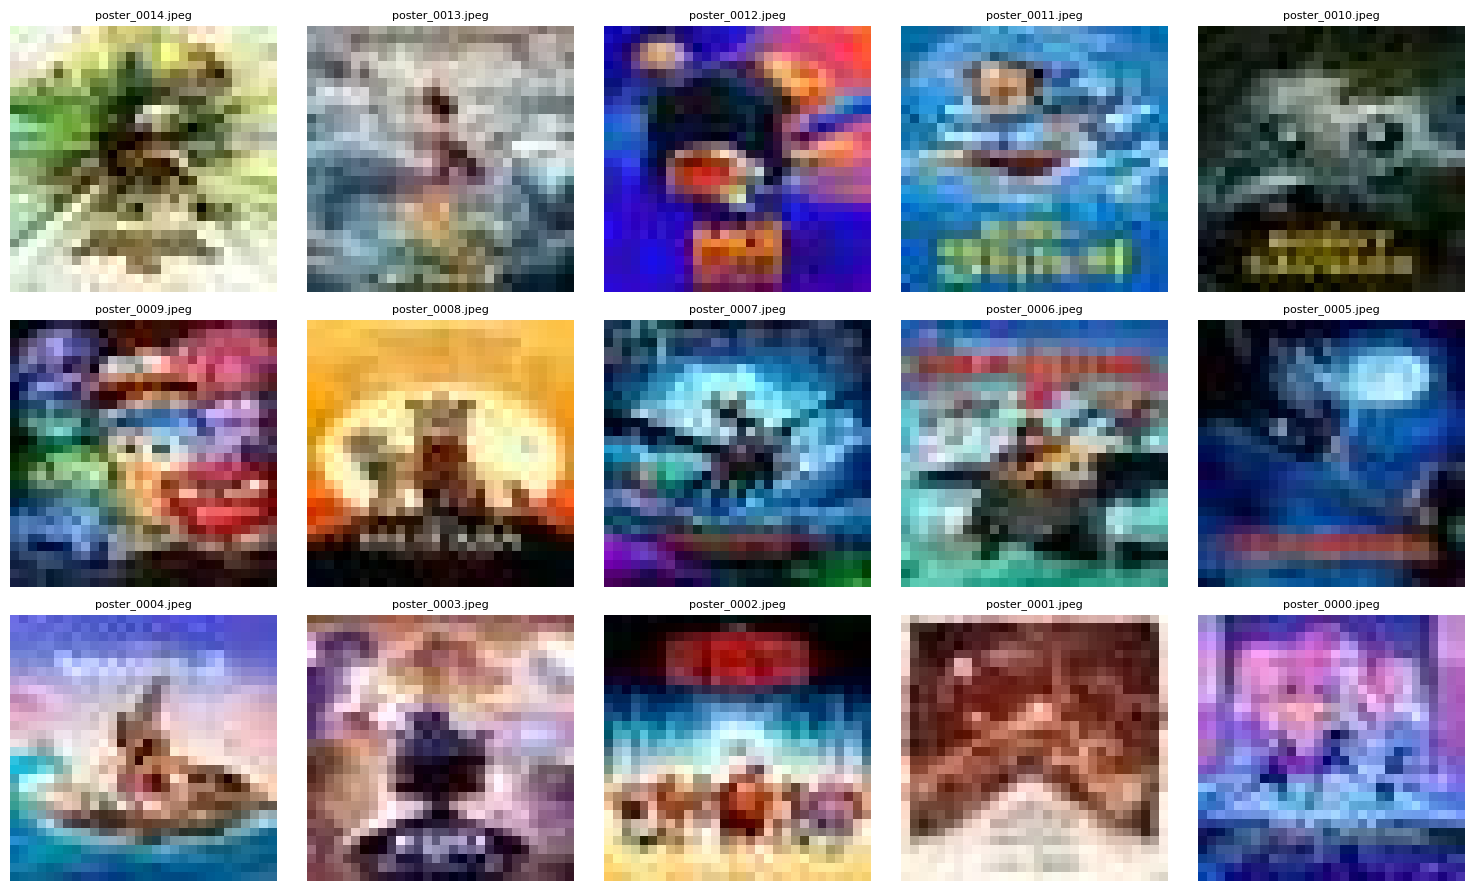

In [2]:
from pymongo import MongoClient
import gridfs
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Initialisation
def init_fs(uri="mongodb://localhost:27017", db_name="affiches"):
    client = MongoClient(uri)
    db = client[db_name]
    return gridfs.GridFS(db)

# Récupération des images
def get_all_images(n=15):
    fs = init_fs()
    files = list(fs.find().sort("uploadDate", -1).limit(n))  # les plus récents d'abord
    images = []
    for f in files:
        data = f.read()
        img = Image.open(BytesIO(data))
        images.append((f.filename, img))
    return images

# Affichage
images = get_all_images(n=15)
cols = 5
rows = (len(images) + cols - 1) // cols
plt.figure(figsize=(15, 3 * rows))

for i, (filename, img) in enumerate(images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(filename, fontsize=8)

plt.tight_layout()
plt.show()
